want: number electron/volume (unit: cm-3)
n_e = density*ionized fraction/proton mass (use electron abundance)

n_e = electronabundance * n_H
get ne for each position
sum over length for path.

want distribution of DM for entire galaxy
sightline going thru galaxy vs cgm alone
- 0.15*R200

proton mass = 8.4e-58 M_sun

In [1]:
import numpy as np
import pandas as pd 

d = {'col1': [1, 2, 3, 4, 5, 6], 'col2': [3, 4, 5, 6, 7, 8]}
df = pd.DataFrame(data=d)

df

,col1,col2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8


In [4]:
np.linalg.norm([[1,2],[3,4]], axis = 0)

array([3.16227766, 4.47213595])

In [14]:
mask = (df['col1'] > 3)
mask

0    False
1    False
2    False
3     True
4     True
5     True
Name: col1, dtype: bool

In [18]:
df_new = df[mask]
df_new

,col1,col2
3,4,6
4,5,7
5,6,8


In [23]:
df_new.loc[:,'new'] = 2

df_new

,col1,col2,new
3,4,6,2
4,5,7,2
5,6,8,2


In [24]:
df

,col1,col2
0,1,3
1,2,4
2,3,5
3,4,6
4,5,7
5,6,8


In [3]:
# attempt at reading in hdf5 files
# coding: utf-8
from gizmo_analysis import io
import h5py
import numpy as np
import os

fh = h5py.File('/pool001/zimi/analysis/FIRE/m12f_res7100/output/snapshot_600.0.hdf5', 'r')
gas = fh["PartType0"]

In [5]:
gas["Potential"][0]

30715.713

In [ ]:
import gizmo_analysis as gizmo

prop = 'size'

part = gizmo.io.Read.read_snapshots(['gas'], 'redshift', 0, '/pool001/zimi/analysis/FIRE/m12f_res7100', properties = 'density', assign_hosts='halo')


In [3]:
part['gas'].prop('number.density')

array([2.70386439e-03, 9.00215643e-04, 6.98191600e-04, ...,
       1.09058213e-07, 1.01814335e-07, 9.33615032e-08])

In [ ]:
step = 10_000

fh = h5py.File("/home/analysis/FIRE/m12f_res7100/output/snapshot_600.0.hdf5", 'r')
fn_out = "m12i/small/snapdir_600/snapshot_600.0.hdf5"
if os.path.exists(fn_out):
    os.remove(fn_out)
os.makedirs(os.path.dirname(fn_out), exist_ok=True)
fout = h5py.File(fn_out, 'w')

fh.copy(fh['Header'], fout, 'Header')
for ii in [0, 1, 2, 4]:
    group = fh[f"PartType{ii}"]
    gout = fout.create_group(f"PartType{ii}")
    nparts = group['ParticleIDs'].size
    for k in group.keys():
        gout.create_dataset(k, data=group[k][::step])

numparts = [0] * 6
for ii in [0, 1, 2, 4]:
    numparts[ii] = fout[f"PartType{ii}"]['ParticleIDs'].size
fout['Header'].attrs['NumPart_ThisFile'] = np.asarray(numparts, dtype=np.int32)
fout['Header'].attrs['NumPart_Total'] = np.asarray(numparts, dtype=np.int32)
fout['Header'].attrs['NumFilesPerSnapshot'] = 1

fout.close()
fh.close()

In [7]:
part['gas']['density']

array([9.3383055e+04, 3.1090645e+04, 2.4113363e+04, ..., 3.7665310e+00,
       3.5163500e+00, 3.2244155e+00], dtype=float32)

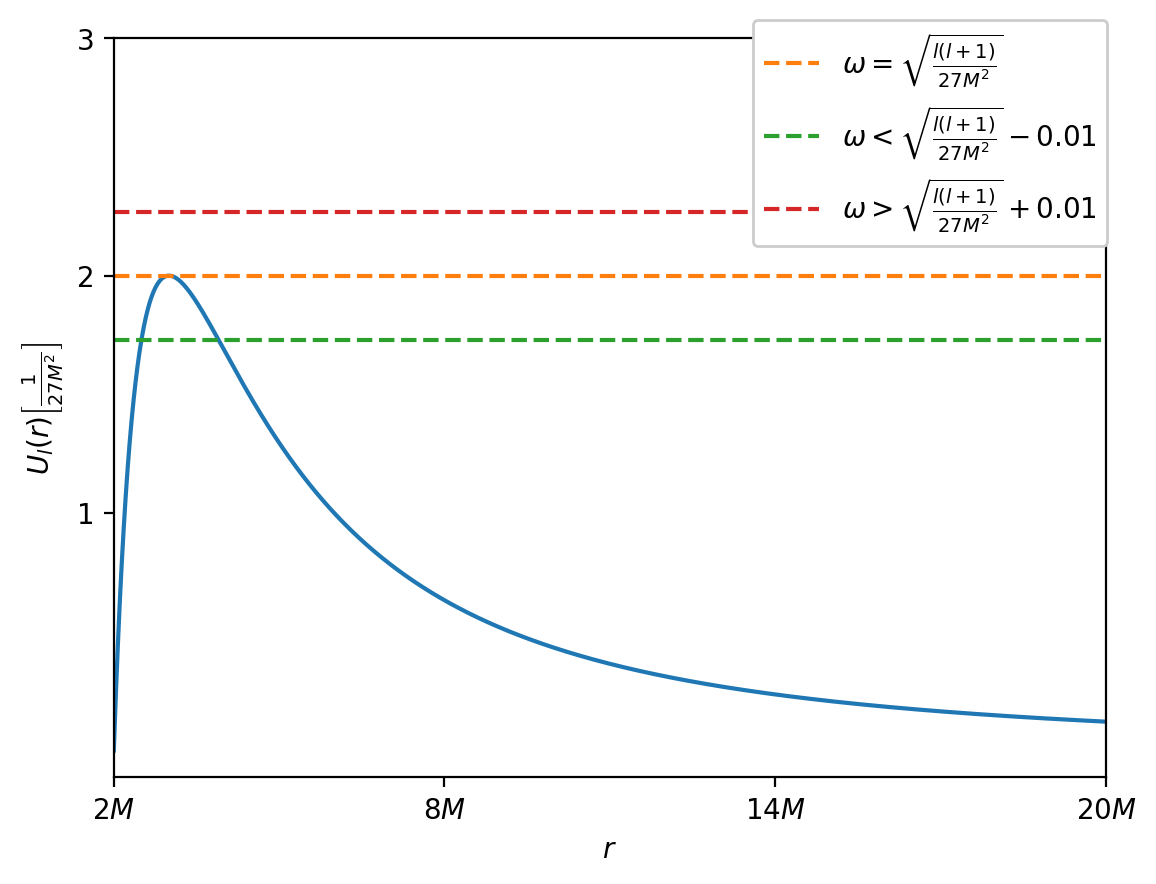

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.dpi'] = 200

l_1 = 1
m = 1
r = np.linspace(2*m, 20, 1000)
y = (1 - 2*m/r)*l_1*(l_1+1)/(r**2)
plt.plot(r, y)
# plt.plot(r, (1 - 2*m/r)*2*(2+1)/(r**2))
# plt.plot(r, (1 - 2*m/r)*3*(3+1)/(r**2))

plt.plot(r, [l_1*(l_1+1)/(27*m**2)]*1000, '--', label = r'$\omega = \sqrt{\frac{l(l+1)}{27M^2}}$')
plt.plot(r, [l_1*(l_1+1)/(27*m**2) - 0.01]*1000, '--', label = r'$\omega < \sqrt{\frac{l(l+1)}{27M^2}}$')
plt.plot(r, [l_1*(l_1+1)/(27*m**2) + 0.01]*1000, '--', label = r'$\omega > \sqrt{\frac{l(l+1)}{27M^2}}$')
# plt.plot(r, [2*(2+1)/(27*m**2)]*1000)
# plt.plot(r, [3*(3+1)/(27*m**2)]*1000)
plt.xlim([2*m, 20])
plt.xticks([2*m, 8*m, 14*m, 20*m], [r'$2M$', r'$8M$',  r'$14M$',  r'$20M$'])
plt.yticks([1/27, 2/27, 3/27], [1,2,3])

plt.ylabel(r'$U_l(r)\left[\frac{1}{27M^2}\right]$')
plt.xlabel(r'$r$')

plt.legend(bbox_to_anchor=(0.63, 0.7), framealpha =1)

plt.show()